- **Competition Name**: Zelestra X AWS ML Ascend Challenge - 2nd Edition

- **Objective**: tasked to develop a Machine Learning model that predicts performance degradation and potential failures in solar panels using historical and real-time sensor data, enabling predictive maintenance and optimal energy output.
  
- **Evaluation Metric**: Score = 100*(1-np.sqrt(metrics.mean_squared_error(actual,predicted))

- **Key Files**:
  
  - `train.csv`, `test.csv`, `sample_submission.csv`

In [1]:
import numpy as np
import pandas as pd

!pip install numpy pandas-profiling matplotlib plotly seaborn --quiet

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.6.1 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/HackerEarth/dataset/train.csv")

# Column Description

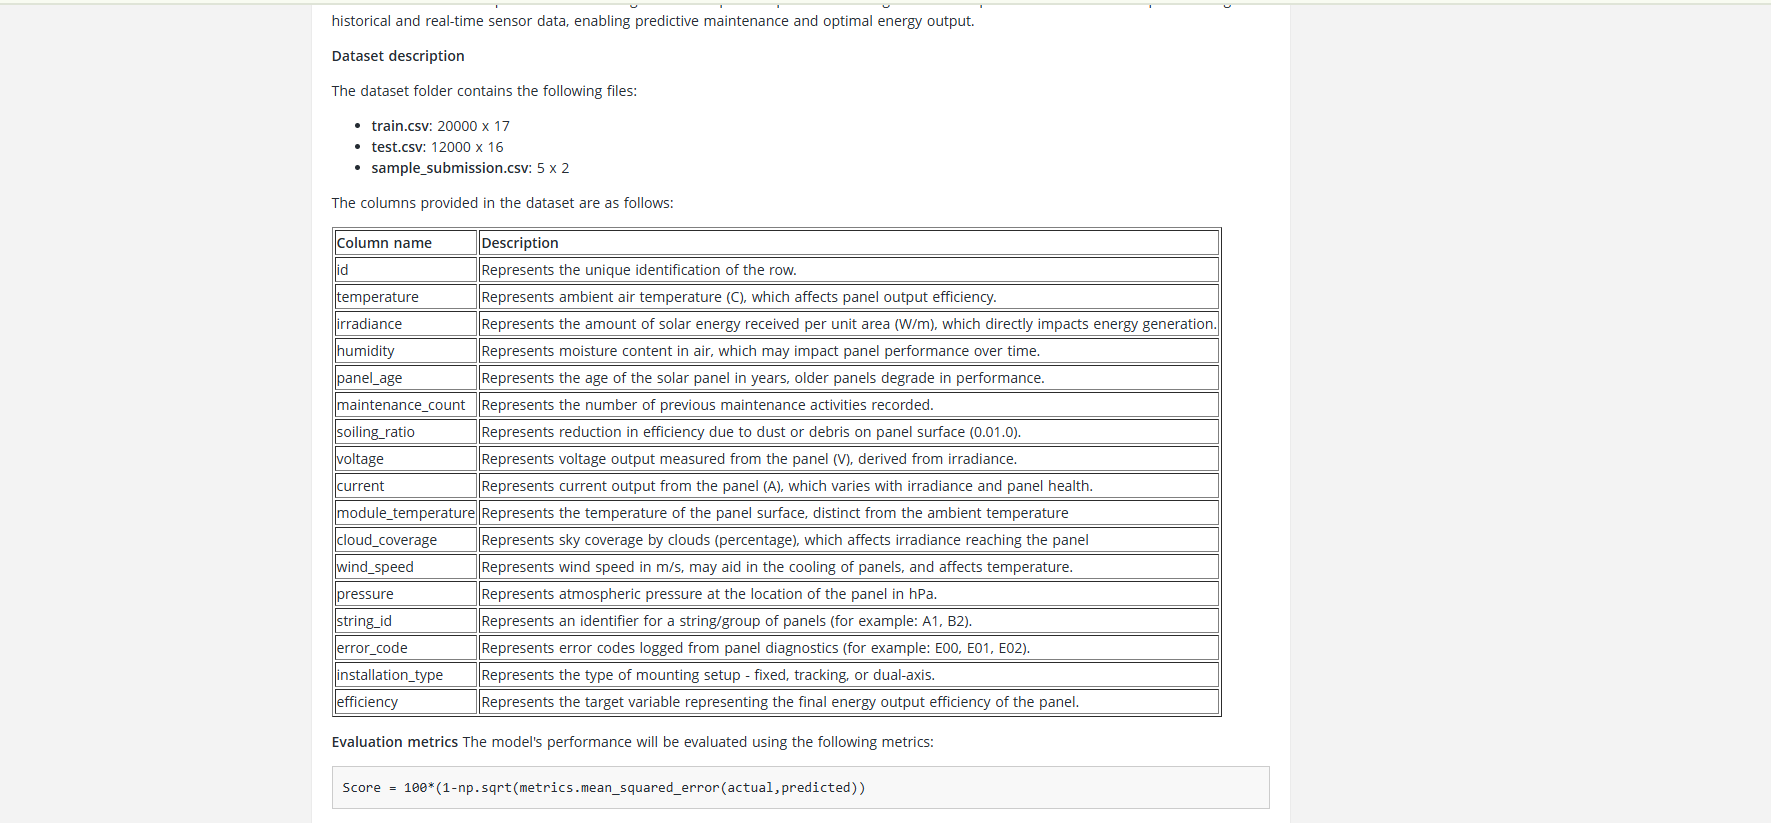


# Photovoltaic (PV) Panel Performance Analysis

## Introduction
Before diving into the problem, it's essential to understand the factors affecting the performance of photovoltaic (PV) panels. Below are the key reasons that influence their efficiency.

---

## Key Factors Affecting PV Panel Performance

### 1. Surface Obstructions
- **Dirt/Debris**: Accumulation of dust, leaves, or any substance on the panel surface blocks sunlight, reducing energy output.
- **Example**: Pollen in spring or sand in arid regions can significantly reduce efficiency.

### 2. Tilt and Orientation
- **Suboptimal Angle**: Incorrect tilt or orientation (azimuth) of panels leads to reduced sunlight exposure.
- **Impact**: Panels must face the sun directly (varies by latitude/season). Poor alignment can cause >20% efficiency loss.

### 3. Temperature Effects
- **High Temperatures**: PV panels lose efficiency as temperatures rise (metallic components degrade faster).
- **Rule of Thumb**: Efficiency drops by ~0.5% per °C above 25°C (STC conditions).

### 4. Degradation Over Time
- **Natural Wear**: PV panels degrade annually (~0.5–3% per year) due to UV exposure, microcracks, and material fatigue.
- **Mitigation**: Use tier-1 panels with degradation warranties (e.g., 80% output after 25 years).

### 5. Inverter Efficiency
- **Conversion Losses**: Inverters convert DC to AC with typical efficiencies of 95–98%. Lower-quality inverters waste more energy.
- **Tip**: Monitor inverter performance (e.g., clipping, downtime).

### 6. Snow and Ice
- **Light Blockage**: Snow cover prevents sunlight absorption until melted/cleared.
- **Cold Benefit**: Ironically, cold temperatures improve panel efficiency (if snow-free).

### 7. Humidity Effects *(New Section)*
- **Corrosion Risk**: High humidity accelerates oxidation of metal components (frames, wiring).
- **Solution**: Use anti-corrosive coatings (e.g., anodized aluminum).
- **Condensation**: Water droplets on glass can scatter light.
- **Data**: Foggy regions show ~5-15% output reduction ([Source](https://www.sciencedirect.com/science/article/pii/S0038092X18305078)).
- **Paradoxical Benefit**:
- *Moderate humidity* can cool panels, offsetting temperature losses.
- *High humidity* often accompanies cloud cover, reducing irradiance.

### 8. Irradiance Impact *(New Section)*
- **Definition**: Solar irradiance (W/m²) is the primary driver of PV output.
- **Key Relationships**:
  - **Direct vs. Diffuse**:
    - *Direct irradiance* (sunlight hitting panels straight on) maximizes output.
    - *Diffuse irradiance* (scattered light) reduces efficiency by ~10-25%.
  - **Spectral Effects**:
    - Panels respond differently to light wavelengths (e.g., silicon panels peak at ~700nm).
- **Seasonal Variation**:
  - Winter irradiance can be <50% of summer levels at high latitudes.

### 9. Module Temperature Effects *(New Section)*
- **Critical Impact**: Cell temperature directly affects efficiency and lifespan.
- **Key Relationships**:
  - **Efficiency Loss**: For every 1°C above STC (25°C), efficiency drops by 0.3-0.5% (crystalline silicon).
  - **Heat Soak**: Dark-colored panels can reach 65-75°C in summer, causing >20% output loss.
---


Text(0, 0.5, 'Efficiency (%)')

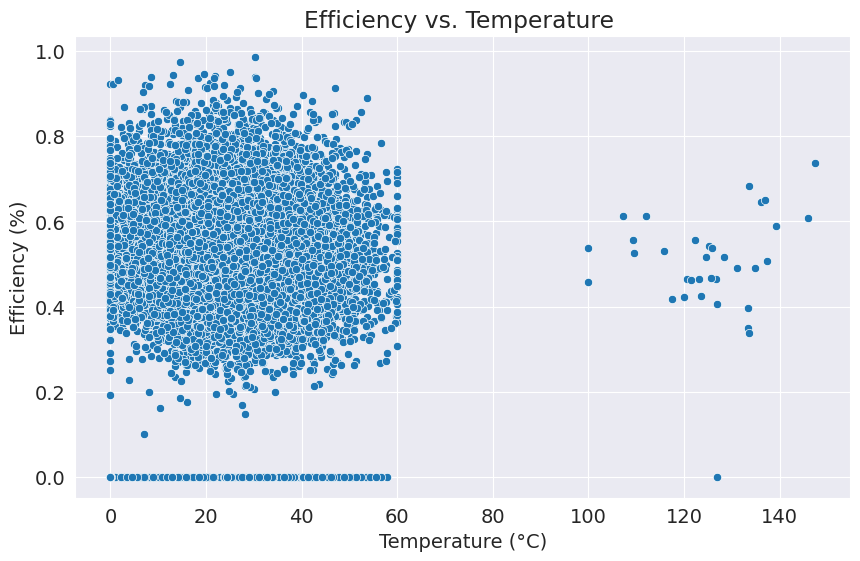

In [ ]:
sns.scatterplot(
    x="temperature",
    y="efficiency",
    data=df
)

plt.title("Efficiency vs. Temperature ")
plt.xlabel("Temperature (°C)")
plt.ylabel("Efficiency (%)")

# Solar Panel Efficiency vs. Temperature Analysis

## Data Overview
The dataset explores the relationship between ambient temperature (°C) and solar panel efficiency (ratio). Key observations:
- **Primary cluster**: Majority of points fall between 0-60°C with efficiency 0.2-1.0
- **Outliers present**:
  - Zero efficiency readings across temperature range
  - Some extreme temperature readings (>100°C)



Text(0, 0.5, 'Efficiency (%)')

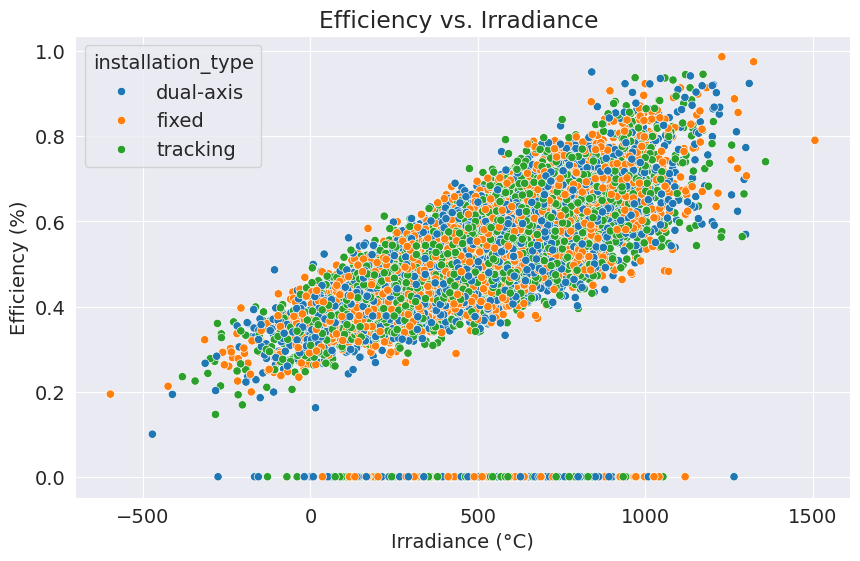

In [ ]:
sns.scatterplot(
    x="irradiance",
    y="efficiency",
    hue="installation_type",
    data=df
)

plt.title("Efficiency vs. Irradiance ")
plt.xlabel("Irradiance (°C)")
plt.ylabel("Efficiency (%)")

# Solar Panel Efficiency vs. Irradiance Analysis

## Data Overview
Well the eff increases **Linearly** with iiradiance



Text(0, 0.5, 'Efficiency (%)')

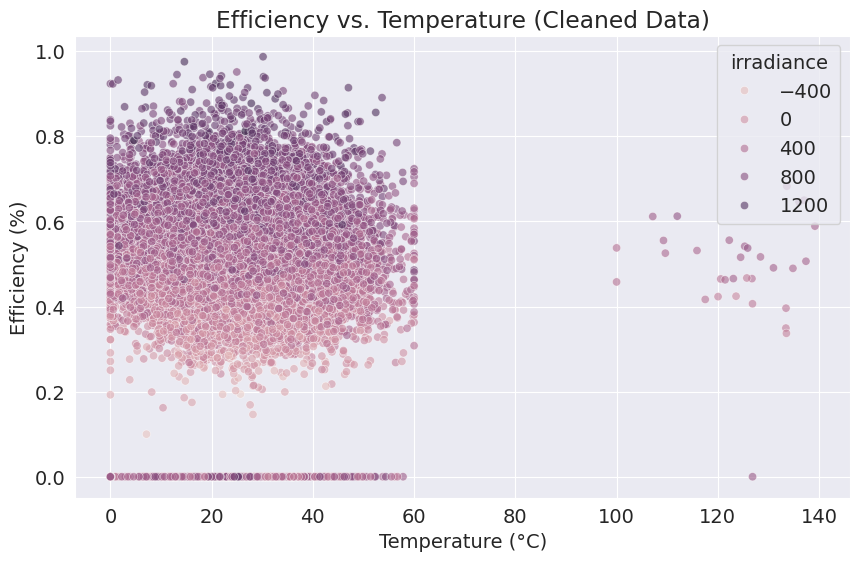

In [ ]:
# Clean data
df_clean = df[(df["efficiency"] >=0) & (df["efficiency"] <= 1)]

# Plot
sns.scatterplot(
    x="temperature",
    y="efficiency",
    hue="irradiance",  # Or another relevant variable
    data=df_clean,
    alpha=0.6
)
plt.title("Efficiency vs. Temperature (Cleaned Data)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Efficiency (%)")

# Temp & Irradiance
## Observations

when the temp is above 25 usually it gets hotter so the eff will go down but since the irradiance is high it gng up

Text(0, 0.5, 'Efficiency (%)')

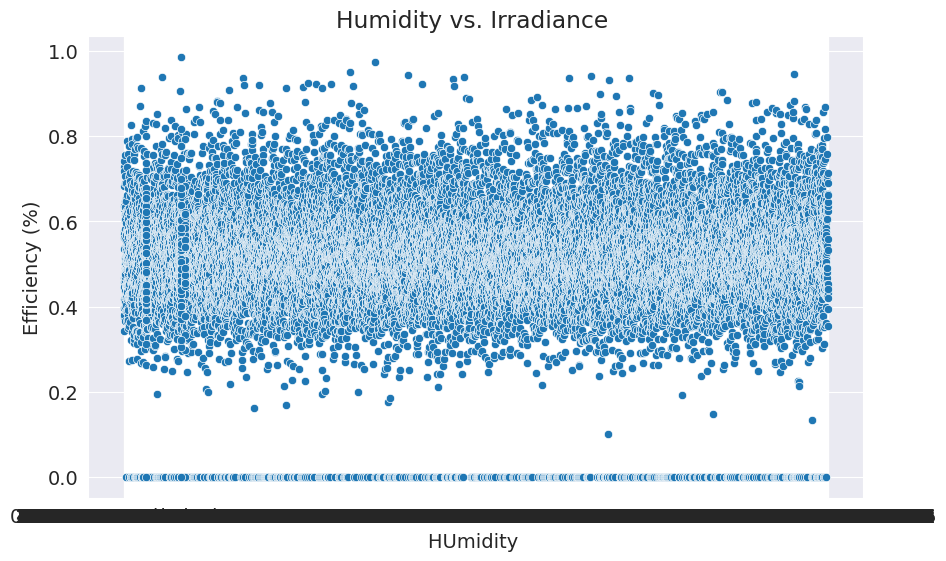

In [ ]:
sns.scatterplot(
    x="humidity",
    y="efficiency",
    data=df
)

plt.title("Humidity vs. Irradiance ")
plt.xlabel("HUmidity ")
plt.ylabel("Efficiency (%)")

## Humidity Vs Efficiency
From this what i think Humidity is not Strongly Corelated with efficiency since other factors over shaded it  for example at 0 there is eff in variuos points and also at high the same we see eff in diff values so i think may be these are all affected by some other factors

Text(0, 0.5, 'Efficiency (%)')

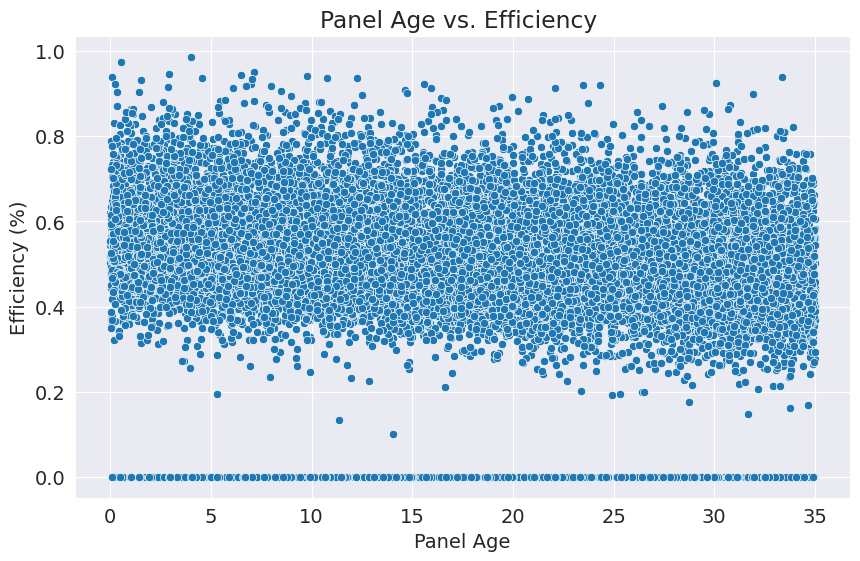

In [ ]:
sns.scatterplot(
    x = "panel_age",
    y = "efficiency",
    data = df
)
plt.title("Panel Age vs. Efficiency ")
plt.xlabel("Panel Age")
plt.ylabel("Efficiency (%)")

## Panel_Age Vs Effciency

As you can see even at age 35 this guys is giving his best may be thats due to the maintenance or any factors

Text(0, 0.5, 'Efficiency')

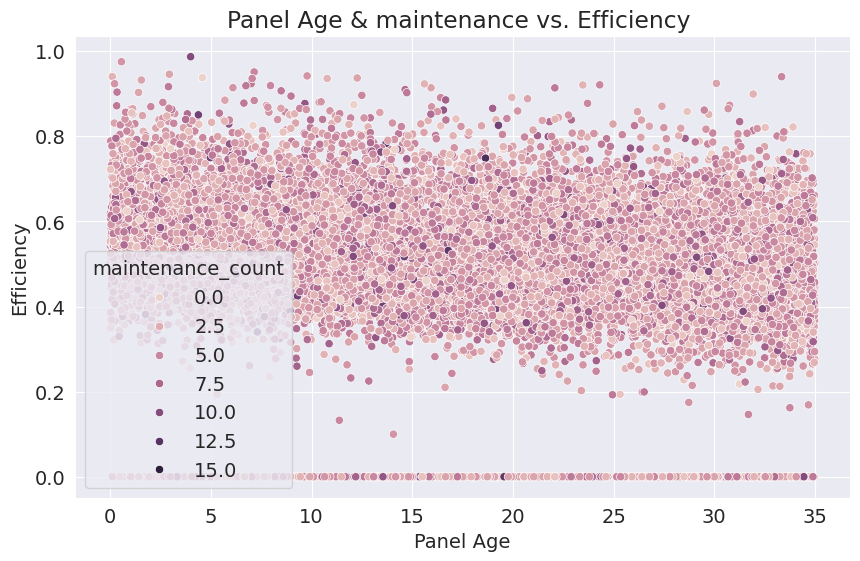

In [ ]:
sns.scatterplot(
    x = "panel_age",
    y = "efficiency",
    hue = "maintenance_count",
    data = df
)
plt.title("Panel Age & maintenance vs. Efficiency ")
plt.xlabel("Panel Age")
plt.ylabel("Efficiency")


# Mixed Results
I can see that even the new panel has high maintenance_count and the oldest panel has less counts

There is no much difference between age affecting the perfomance

But there is some slight downwardness we can see

And Some Outliers


Text(0, 0.5, 'Efficiency (%)')

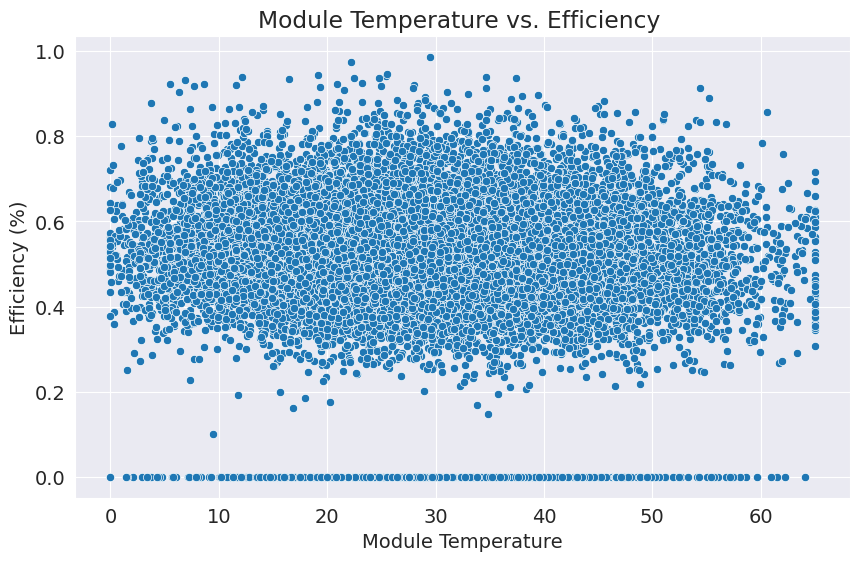

In [ ]:
sns.scatterplot(
    x = "module_temperature" ,
    y = "efficiency",

    data = df
)

plt.title("Module Temperature vs. Efficiency ")
plt.xlabel("Module Temperature")
plt.ylabel("Efficiency (%)")

# Module_temperature Vs Efficiency

Well when we at 0deg  we get some eff cause module perform is good when it is not hot

and also we can see that module gives eff at high temp also

how?? may be it get more Sunlight High irradiance or no clouds good panel conditions excetra

Text(0, 0.5, 'Efficiency (%)')

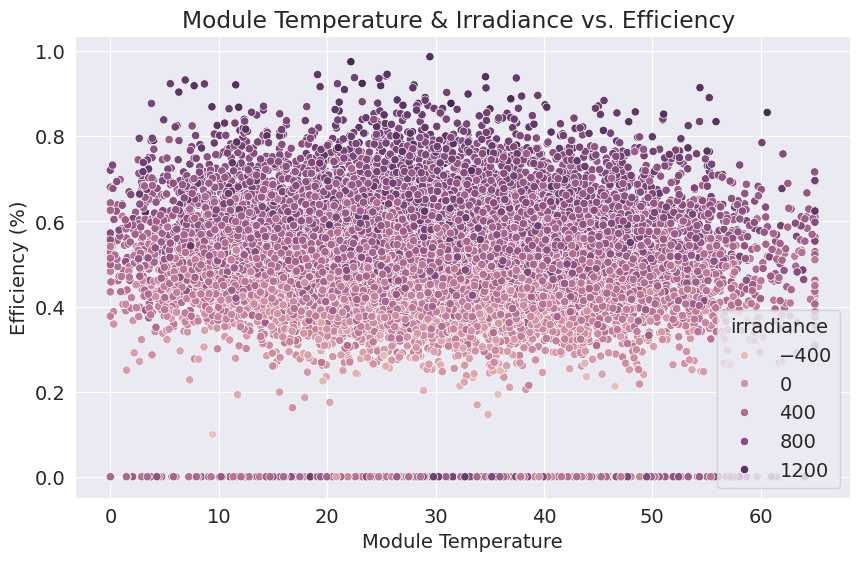

In [ ]:
sns.scatterplot(
    x = "module_temperature" ,
    y = "efficiency",
    hue = "irradiance" ,
    data = df
)
plt.title("Module Temperature & Irradiance vs. Efficiency ")
plt.xlabel("Module Temperature")
plt.ylabel("Efficiency (%)")

## this explains why we get that

#Wind_Speed Vs Efficiency
I couldnt able to find any diff as even both at low and high we can see eff

I think this factor is not Independant like iiradiance or any i think it co depends on module temperature or atmoshpere temperature

as in this cools the module  will see that

<Axes: xlabel='wind_speed', ylabel='efficiency'>

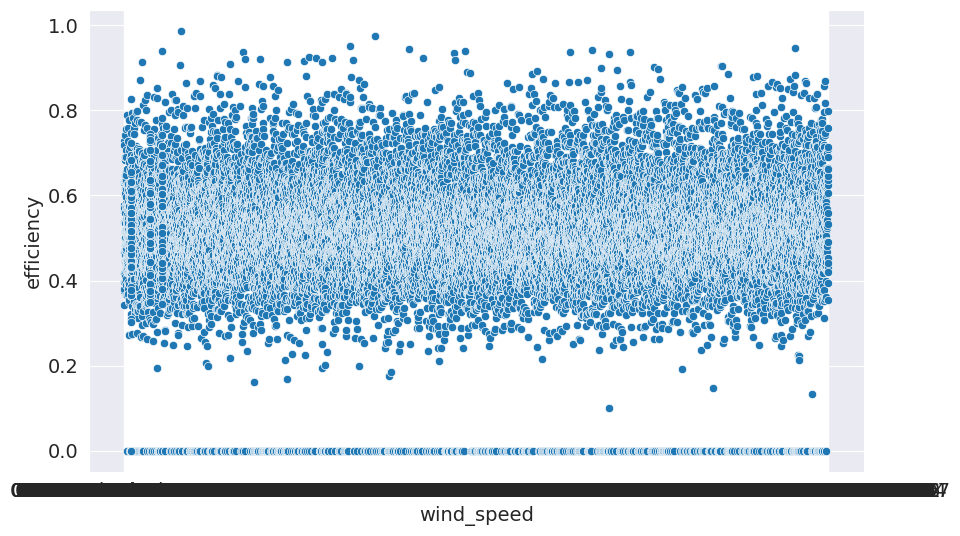

In [ ]:
sns.scatterplot(
    x = "wind_speed" ,
    y = "efficiency",
    data = df
)
plt.title("Wind Speed vs. Efficiency ")
plt.xlabel("Wind Speed")
plt.ylabel("Efficiency (%)")

Text(0, 0.5, 'Efficiency (%)')

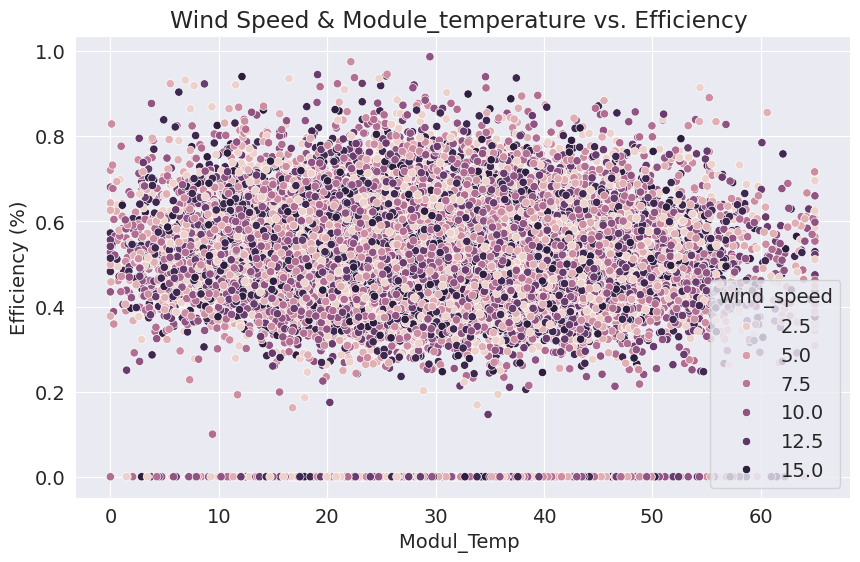

In [ ]:
sns.scatterplot(
    x = "module_temperature" ,
    y = "efficiency",
    hue = "wind_speed" ,
    data = df
)
plt.title("Wind Speed & Module_temperature vs. Efficiency ")
plt.xlabel("Modul_Temp ")
plt.ylabel("Efficiency (%)")

In [ ]:
# # Convert wind_speed to float (handles non-numeric values safely)
# df['wind_speed'] = pd.to_numeric(df['wind_speed'], errors='coerce')

# # Update values safely and efficiently
# df.loc[(df['wind_speed'] > 0) & (df['wind_speed'] <= 2), 'wind_speed'] = 2

# df.loc[(df['wind_speed'] > 2) & (df['wind_speed'] <= 4), 'wind_speed'] = 4

# df.loc[(df['wind_speed'] > 4) & (df['wind_speed'] <= 6), 'wind_speed'] = 6

# df.loc[(df['wind_speed'] > 6) & (df['wind_speed'] <= 8), 'wind_speed'] = 8

# df.loc[(df['wind_speed'] > 8) & (df['wind_speed'] <= 10), 'wind_speed'] = 10

# df.loc[(df['wind_speed'] > 10) & (df['wind_speed'] <= 12), 'wind_speed'] = 12

# df.loc[(df['wind_speed'] > 12) & (df['wind_speed'] <= 14), 'wind_speed'] = 14

# df.loc[(df['wind_speed'] > 14) & (df['wind_speed'] <= 15), 'wind_speed'] = 15




Text(0, 0.5, 'Efficiency (%)')

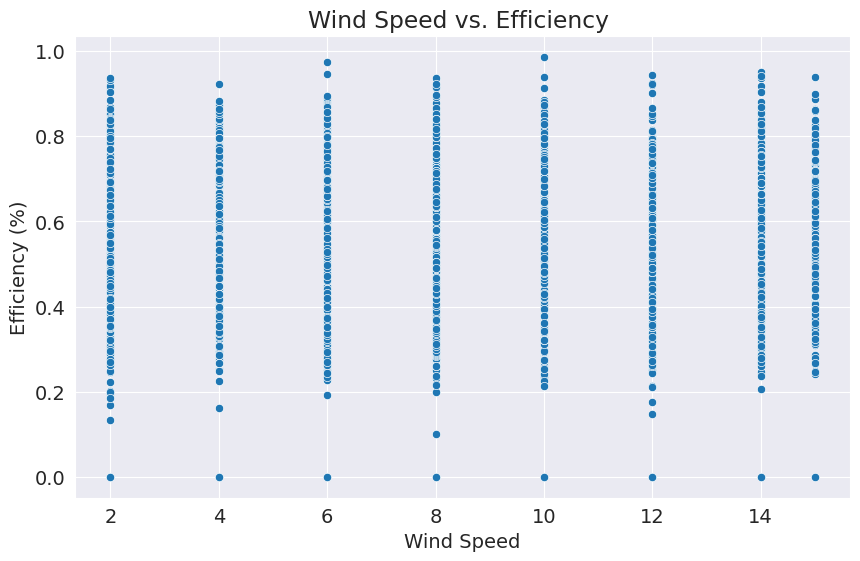

In [ ]:
sns.scatterplot(
    x = "wind_speed" ,
    y = "efficiency",
    data = df
)
plt.title("Wind Speed vs. Efficiency ")
plt.xlabel("Wind Speed")
plt.ylabel("Efficiency (%)")

Text(0, 0.5, 'Efficiency (%)')

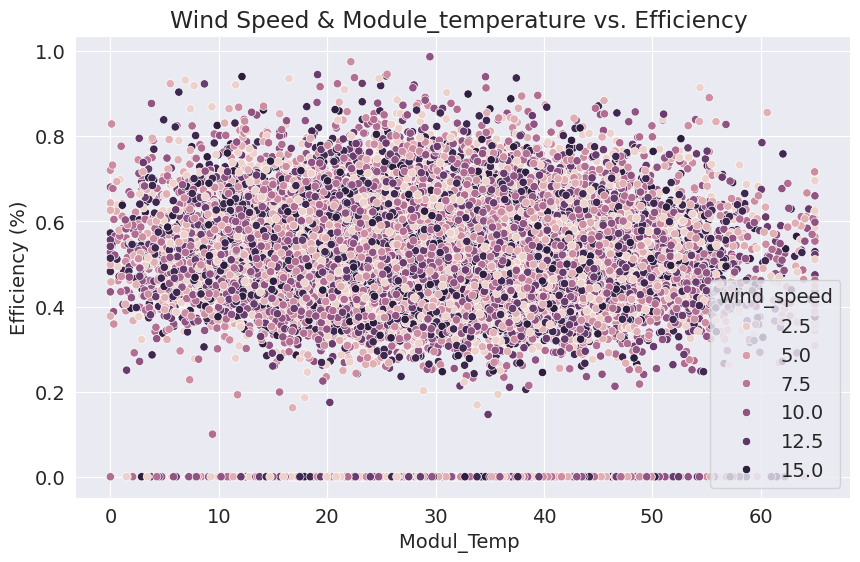

In [ ]:
sns.scatterplot(
    x = "module_temperature" ,
    y = "efficiency",
    hue = "wind_speed" ,
    data = df
)
plt.title("Wind Speed & Module_temperature vs. Efficiency ")
plt.xlabel("Modul_Temp ")
plt.ylabel("Efficiency (%)")

## Earlier we couldnt see things Properly due to wind speed values now for understanding purpose we processed them

Now as you can see at some points the temp is high and the wind speed is also high and when you remember the iiradiance relation now well combining three we can assume or lets say somehow this wind speed reduces the temperature and and even when at low irradiance due to high wind speed  the module cools and gives output

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   temperature         18999 non-null  float64
 2   irradiance          19013 non-null  float64
 3   humidity            20000 non-null  object 
 4   panel_age           18989 non-null  float64
 5   maintenance_count   18973 non-null  float64
 6   soiling_ratio       18990 non-null  float64
 7   voltage             19007 non-null  float64
 8   current             19023 non-null  float64
 9   module_temperature  19022 non-null  float64
 10  cloud_coverage      18990 non-null  float64
 11  wind_speed          19881 non-null  float64
 12  pressure            20000 non-null  object 
 13  string_id           20000 non-null  object 
 14  error_code          14088 non-null  object 
 15  installation_type   14972 non-null  object 
 16  effi

# Now Lets Analyze String id Col

In [ ]:
new_df = df.groupby(['string_id' , 'installation_type'], as_index=False)['efficiency'].mean()
new_df

string_id installation_type  efficiency
0         A1         dual-axis    0.505947
1         A1             fixed    0.502744
2         A1          tracking    0.508418
3         B2         dual-axis    0.508270
4         B2             fixed    0.514429
5         B2          tracking    0.513289
6         C3         dual-axis    0.508675
7         C3             fixed    0.511871
8         C3          tracking    0.516046
9         D4         dual-axis    0.504845
10        D4             fixed    0.514456
11        D4          tracking    0.508649

## You can see each id has three diff intsallation types

solar_panel_axis.avif

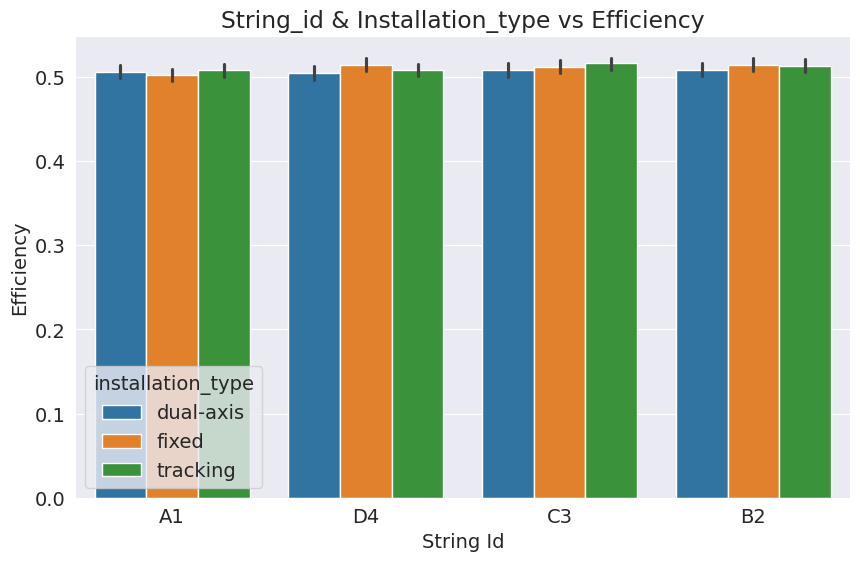

In [ ]:
sns.barplot(
    x = "string_id" ,
    y = "efficiency" ,
    hue = "installation_type" ,
    data = df
)

plt.title("String_id & Installation_type vs Efficiency")
plt.xlabel("String Id")
plt.ylabel("Efficiency")
plt.show()

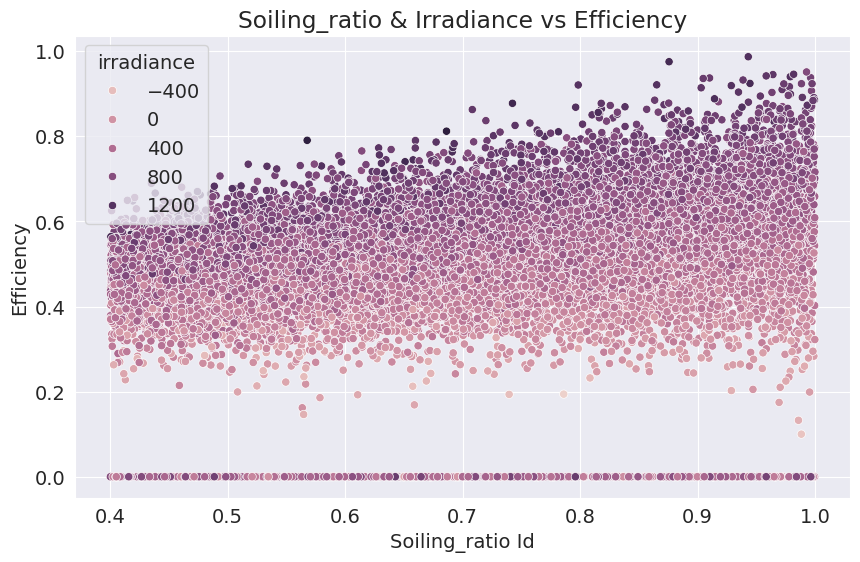

In [ ]:
sns.scatterplot(
    x = "soiling_ratio" ,
    y = "efficiency" ,
    hue = "irradiance" ,
    data = df
)

plt.title("Soiling_ratio & Irradiance vs Efficiency")
plt.xlabel("Soiling_ratio Id")
plt.ylabel("Efficiency")
plt.show()

# Observation

 Soiling ratio high indicates the Surface is Covered with dust particles and debris

 But even though we have some output is either because of iiradiance or other factors might aswell

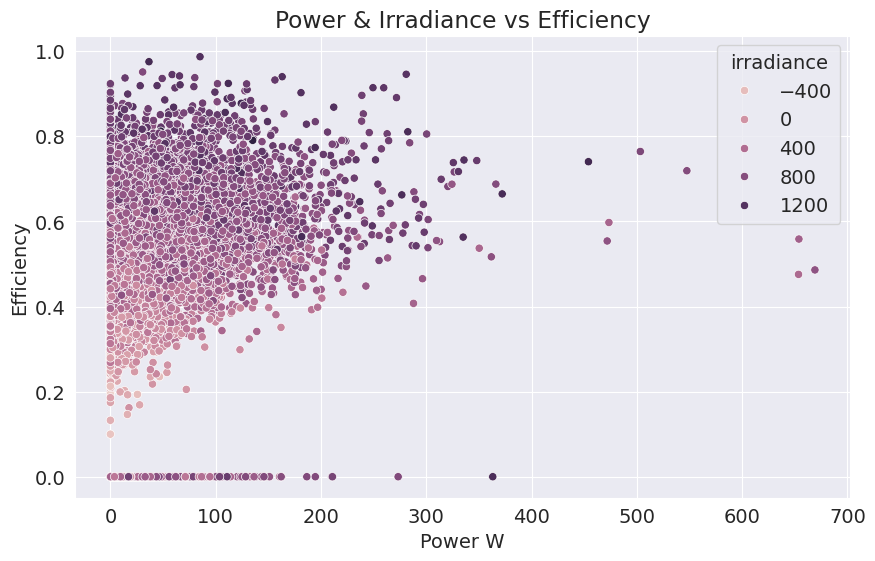

In [ ]:
sns.scatterplot(
    x = "power" ,
    y = "efficiency" ,
    hue = "irradiance" ,
    data = df
)

plt.title("Power & Irradiance vs Efficiency")
plt.xlabel("Power W")
plt.ylabel("Efficiency")
plt.show()

#Lets Find how many Col are having NAN

In [ ]:
col = []
for i in df.columns:
    if (df[i].isna().sum()):
      col.append(i)

In [ ]:
col

['temperature',
 'irradiance',
 'panel_age',
 'maintenance_count',
 'soiling_ratio',
 'voltage',
 'current',
 'module_temperature',
 'cloud_coverage',
 'error_code',
 'installation_type']

**Now we some how have to fill those nan values but How ??**

We Know that they are in groups and has names like A1 B1 and type like dual etc

**So now lets group them and find mean for that ??? Hmm will this be correct Lets Check**




In [ ]:
new_df = df[df['string_id']=="A1"]  # for example i take 1 sample

In [ ]:
new_df

id  temperature  irradiance           humidity  panel_age  \
0          0     7.817315  576.179270  41.24308670850264  32.135501   
3          3    53.339567  735.141179  96.19095521176159  18.491582   
6          6    18.728064  531.960101  91.25225388383434  20.672099   
23        23    34.917213  461.367629  60.88613197764313  16.076125   
24        24    29.782199  392.918044  38.07167441833237  32.582560   
...      ...          ...         ...                ...        ...   
19976  19976    28.906365  744.814826  26.70746839365875  34.884858   
19978  19978    20.650822  663.415422  0.766363496146627  32.386943   
19981  19981    20.437351  169.286097  90.08595496665234  26.048764   
19984  19984    42.247396  723.389255  32.94834853602785  30.318481   
19998  19998          NaN  632.760700  43.01470184078199  19.063517   

       maintenance_count  soiling_ratio    voltage   current  \
0                    4.0       0.803199  37.403527  1.963787   
3                    3.0       0.837529  46.295748  0.960567   
6                    4.0       0.911821   0.706348  2.131411   
23                   6.0       0.593823  25.229268  0.390737   
24                   4.0       0.719019   0.000000  0.796112   
...                  ...            ...        ...       ...   
19976                6.0       0.439728  18.418306  0.574418   
19978                3.0       0.541334  12.936880  0.419348   
19981                3.0       0.902012   4.969164  0.268551   
19984                4.0       0.407063  51.057209  1.156462   
19998                4.0            NaN   0.000000  1.068906   

       module_temperature  cloud_coverage          wind_speed  \
0               13.691147       62.494044   12.82491203459621   
3               57.720436       67.361473   8.736258932034128   
6               26.521808       31.736361  3.5938300615145584   
23              40.737696       87.128233   9.196479438626795   
24              35.229958        6.278273  0.7985304351521505   
...                   ...             ...                 ...   
19976           33.406304       35.211552    5.67631203864816   
19978           27.195187        6.088673  1.1292167538383402   
19981           24.372383             NaN  14.085257286584424   
19984           40.277390       11.537020  14.862867450165286   
19998           21.149351       78.123689  11.304158443374758   

                 pressure string_id error_code installation_type  efficiency  
0      1018.8665053152533        A1        NaN               NaN    0.562096  
3      1021.8466633134253        A1        NaN         dual-axis    0.629009  
6      1016.0050796132181        A1        E00             fixed    0.537196  
23     1021.4074573669117        A1        E01         dual-axis    0.536361  
24     1008.7504815771696        A1        E01          tracking    0.535563  
...                   ...       ...        ...               ...         ...  
19976  1026.1086724164525        A1        E00          tracking    0.426607  
19978  1040.6756055428514        A1        E02             fixed    0.443091  
19981  1018.0080322089365        A1        E01         dual-axis    0.424201  
19984  1017.2565797547429        A1        NaN         dual-axis    0.532877  
19998  1006.6738746072241        A1        E00          tracking    0.661963  

[4902 rows x 17 columns]

In [ ]:
new_df.describe() # Lets check the Facts among them

id  temperature   irradiance    panel_age  maintenance_count  \
count   4902.000000  4656.000000  4673.000000  4662.000000        4658.000000   
mean    9993.836597    25.046976   493.208899    17.860442           3.980893   
std     5779.948258    12.493477   248.809867    10.091453           1.967052   
min        0.000000     0.000000  -597.278646     0.005754           0.000000   
25%     4996.750000    16.772330   327.374834     9.234937           3.000000   
50%    10031.500000    24.587751   491.770286    17.901781           4.000000   
75%    14960.750000    32.662056   658.217081    26.573561           5.000000   
max    19998.000000   147.394168  1537.810349    34.991355          12.000000   

       soiling_ratio      voltage      current  module_temperature  \
count    4664.000000  4648.000000  4643.000000         4677.000000   
mean        0.697495    15.805048     1.683347           29.943954   
std         0.173750    19.096329     1.146090           12.218724   
min         0.400324     0.000000     0.000352            0.000000   
25%         0.545519     0.000000     0.743204           21.407780   
50%         0.697308    11.543643     1.529760           29.849876   
75%         0.846717    25.983049     2.446827           38.090361   
max         0.999541   494.279016     6.652854           65.000000   

       cloud_coverage   efficiency  
count     4665.000000  4902.000000  
mean        50.571253     0.506600  
std         44.715265     0.137616  
min          0.000244     0.000000  
25%         24.298047     0.441917  
50%         48.598542     0.510450  
75%         74.553961     0.585955  
max       1000.000000     0.945078

Text(0, 0.5, 'Efficiency')

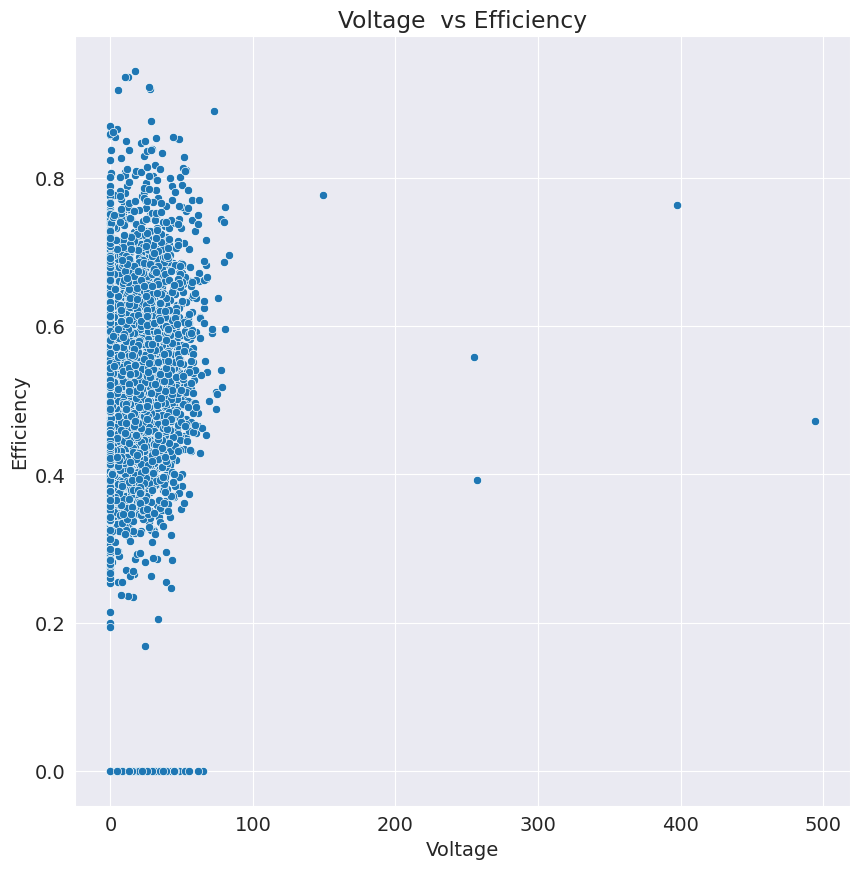

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "voltage" ,
    y = "efficiency" ,

    data = new_df
)

plt.title("Voltage  vs Efficiency")

plt.xlabel("Voltage")
plt.ylabel("Efficiency")


#For Example i took Voltage but i coudlnt find a best value for this cause mean wont be correct and What else should i try?


# **Now Lets try to See how many Columns that as Null Values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   temperature         18999 non-null  float64
 2   irradiance          19013 non-null  float64
 3   humidity            20000 non-null  object 
 4   panel_age           18989 non-null  float64
 5   maintenance_count   18973 non-null  float64
 6   soiling_ratio       18990 non-null  float64
 7   voltage             19007 non-null  float64
 8   current             19023 non-null  float64
 9   module_temperature  19022 non-null  float64
 10  cloud_coverage      18990 non-null  float64
 11  wind_speed          20000 non-null  object 
 12  pressure            20000 non-null  object 
 13  string_id           20000 non-null  object 
 14  error_code          14088 non-null  object 
 15  installation_type   14972 non-null  object 
 16  effi

# **Since Finding Just mean for all col wont be Correct Since the values are not evenly Distibuted**

## **So Lets Use ML Model to predict the missing Values**

# Lets Split the Cols

## Numerical col

    **numerical_cols = ['temperature' , 'irradiance', 'humidity', 'panel_age' , 'maintenance_count'  ,  'soiling_ratio', 'voltage', 'current',
## Categorical col
    categorical_cols = ['installation_type' , 'error_code']

In [ ]:
# Trainind Data
numerical_cols = ['temperature' , 'irradiance', 'humidity', 'panel_age' , 'maintenance_count'  ,  'soiling_ratio', 'voltage', 'current',
            'module_temperature', 'cloud_coverage', 'wind_speed', 'pressure' , 'efficiency']

categorical_cols = ['error_code']

new_df = df.copy()

for col in numerical_cols:
    new_df[col] = pd.to_numeric(new_df[col], errors='coerce')



In [ ]:
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   temperature         18999 non-null  float64
 2   irradiance          19013 non-null  float64
 3   humidity            19873 non-null  float64
 4   panel_age           18989 non-null  float64
 5   maintenance_count   18973 non-null  float64
 6   soiling_ratio       18990 non-null  float64
 7   voltage             19007 non-null  float64
 8   current             19023 non-null  float64
 9   module_temperature  19022 non-null  float64
 10  cloud_coverage      18990 non-null  float64
 11  wind_speed          19881 non-null  float64
 12  pressure            19865 non-null  float64
 13  string_id           20000 non-null  object 
 14  error_code          14088 non-null  object 
 15  installation_type   14972 non-null  object 
 16  effi

# **Now Lets Encode The catgeorical Col**
##**Like this**


[ 'error_code_E00',
 'error_code_E01',
 'error_code_E02',
 'error_code_nan']

##**and**

['dual-axis' as 0, 'fixed' as 1, 'tracking' as 2, ...]  **and the nan values is kept as nan so that we can predict**



In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder().fit(new_df[["error_code"]])
encoder_list = list(encoder.get_feature_names_out())

new_df[encoder_list] = encoder.transform(new_df[["error_code"]]).toarray()


from sklearn.preprocessing import LabelEncoder

known_df = new_df[new_df['installation_type'].notna()].copy()
# unknown_df = new_df[new_df['installation_type'].isna()].copy()

le = LabelEncoder()
known_df['installation_type_encoded'] = le.fit_transform(known_df['installation_type'])



new_df['installation_type_encoded'] = np.nan

new_df.loc[known_df.index, 'installation_type_encoded'] = known_df['installation_type_encoded']




In [ ]:
# Create a DataFrame showing original vs encoded
mapping_df = pd.DataFrame({
    'installation_type': le.classes_,
    'encoded_label': range(len(le.classes_))
})

print(mapping_df)



  installation_type  encoded_label
0         dual-axis              0
1             fixed              1
2          tracking              2


# **Now that we have encoded categorical features for Train Data :**
Now will ready dataset for training the model

In [ ]:
cat_col = [ "installation_type_encoded",'error_code_E00','error_code_E01', 'error_code_E02', 'error_code_nan']

# **General Formula (from solar flux):**
🔹 Irradiance (E) = **Power / Area * eff**


# Lets try to find a new Col Area of the panel

In [ ]:
new_df['power'] = new_df['voltage'] * new_df['current']
new_df['area'] = new_df["power"] / (new_df['irradiance'] * new_df["efficiency"] )



new_df.head()

id  temperature  irradiance   humidity  panel_age  maintenance_count  \
0   0     7.817315  576.179270  41.243087  32.135501                4.0   
1   1    24.785727  240.003973   1.359648  19.977460                8.0   
2   2    46.652695  687.612799  91.265368   1.496401                4.0   
3   3    53.339567  735.141179  96.190955  18.491582                3.0   
4   4     5.575374   12.241203  27.495073  30.722697                6.0   

   soiling_ratio    voltage   current  module_temperature  ...  error_code  \
0       0.803199  37.403527  1.963787           13.691147  ...         NaN   
1       0.479456  21.843315  0.241473           27.545096  ...         E00   
2       0.822398  48.222882  4.191800           43.363708  ...         E00   
3       0.837529  46.295748  0.960567           57.720436  ...         NaN   
4       0.551833   0.000000  0.898062            6.786263  ...         E00   

   installation_type  efficiency error_code_E00 error_code_E01 error_code_E02  \
0                NaN    0.562096            0.0            0.0            0.0   
1          dual-axis    0.396447            1.0            0.0            0.0   
2                NaN    0.573776            1.0            0.0            0.0   
3          dual-axis    0.629009            0.0            0.0            0.0   
4              fixed    0.341874            1.0            0.0            0.0   

   error_code_nan  installation_type_encoded       power      area  
0             1.0                        NaN   73.452561  0.226798  
1             0.0                        0.0    5.274577  0.055435  
2             0.0                        NaN  202.140687  0.512351  
3             1.0                        0.0   44.470168  0.096170  
4             0.0                        1.0    0.000000  0.000000  

[5 rows x 24 columns]

# **Split the input_df from original dataset**


In [ ]:

for col in numerical_cols + cat_col:
    new_df[col] = pd.to_numeric(new_df[col], errors='coerce')

new_df.info()
new_df['area'] = new_df['area'].replace([np.inf, -np.inf], 0)

input_df = new_df[numerical_cols + cat_col + ['area' , 'power']  ]
input_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         20000 non-null  int64  
 1   temperature                18999 non-null  float64
 2   irradiance                 19013 non-null  float64
 3   humidity                   19873 non-null  float64
 4   panel_age                  18989 non-null  float64
 5   maintenance_count          18973 non-null  float64
 6   soiling_ratio              18990 non-null  float64
 7   voltage                    19007 non-null  float64
 8   current                    19023 non-null  float64
 9   module_temperature         19022 non-null  float64
 10  cloud_coverage             18990 non-null  float64
 11  wind_speed                 19881 non-null  float64
 12  pressure                   19865 non-null  float64
 13  string_id                  20000 non-null  obj

In [ ]:
input_df.head()


temperature  irradiance   humidity  panel_age  maintenance_count  \
0     7.817315  576.179270  41.243087  32.135501                4.0   
1    24.785727  240.003973   1.359648  19.977460                8.0   
2    46.652695  687.612799  91.265368   1.496401                4.0   
3    53.339567  735.141179  96.190955  18.491582                3.0   
4     5.575374   12.241203  27.495073  30.722697                6.0   

   soiling_ratio    voltage   current  module_temperature  cloud_coverage  \
0       0.803199  37.403527  1.963787           13.691147       62.494044   
1       0.479456  21.843315  0.241473           27.545096       43.851238   
2       0.822398  48.222882  4.191800           43.363708             NaN   
3       0.837529  46.295748  0.960567           57.720436       67.361473   
4       0.551833   0.000000  0.898062            6.786263        3.632000   

   wind_speed     pressure  efficiency  installation_type_encoded  \
0   12.824912  1018.866505    0.562096                        NaN   
1   12.012044  1025.623854    0.396447                        0.0   
2    1.814400  1010.922654    0.573776                        NaN   
3    8.736259  1021.846663    0.629009                        0.0   
4    0.522684  1008.555958    0.341874                        1.0   

   error_code_E00  error_code_E01  error_code_E02  error_code_nan      area  \
0             0.0             0.0             0.0             1.0  0.226798   
1             1.0             0.0             0.0             0.0  0.055435   
2             1.0             0.0             0.0             0.0  0.512351   
3             0.0             0.0             0.0             1.0  0.096170   
4             1.0             0.0             0.0             0.0  0.000000   

        power  
0   73.452561  
1    5.274577  
2  202.140687  
3   44.470168  
4    0.000000

In [ ]:
predict_col = []
for col in numerical_cols + cat_col:
    if new_df[col].isna().sum() != 0:
        predict_col.append(col)
predict_col.append('area')
predict_col.append('power')
predict_col

NameError: name 'numerical_cols' is not defined

# **Lets create a Function to automate the training model and predicting Values**

In [ ]:
import xgboost as xgb
def predict_temperature(input_df, new_df, numerical_cols, encoder_list, target):

    from sklearn.preprocessing import StandardScaler

    scale_col = numerical_cols + cat_col + ['area' , 'power']
    scale_col.remove(target)

    scaler = StandardScaler().fit(new_df[scale_col])

    input_df_copy = input_df.copy()
    input_df_copy[scale_col] = scaler.transform(input_df_copy[scale_col])

    known_df = input_df_copy[input_df_copy[target].notna()]
    unknown_df = input_df_copy[input_df_copy[target].isna()]

    feature = numerical_cols + cat_col +['area' , 'power']
    if target in feature:
        feature.remove(target)

    known_df = known_df.dropna(subset=feature)
    unknown_df = unknown_df.dropna(subset=feature)

    x_train = known_df[feature]
    y_train = known_df[target]
    x_test = unknown_df[feature]

    model = xgb.XGBRegressor(
        n_estimators=1000,
        learning_rate=0.01,
        max_depth=10,
        subsample=0.8,
        colsample_bytree=0.8,
        n_jobs=-1
    )
    model.fit(x_train, y_train)

    predicted_temp = model.predict(x_test)

    unknown_df = unknown_df.copy()
    unknown_df[target] = predicted_temp
    unknown_df.reset_index(inplace=True)
    unknown_df.rename(columns={'index': 'id'}, inplace=True)

    predicted_temp_series = pd.Series(predicted_temp, index=unknown_df['id'])

    new_df.loc[new_df[target].isna(), target] = (
        new_df.loc[new_df[target].isna(), 'id'].map(predicted_temp_series)
    )

    return new_df


# **Training The Data**

In [ ]:
for col in predict_col:
    new_df = predict_temperature(input_df, new_df, numerical_cols, encoder_list , col)

new_df.to_csv("/content/drive/MyDrive/HackerEarth/dataset/new_df.csv")


In [ ]:
new_df = pd.read_csv("/content/drive/MyDrive/HackerEarth/dataset/new_df.csv")

new_df = new_df.drop(columns=["Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0"])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         20000 non-null  int64  
 1   temperature                19509 non-null  float64
 2   irradiance                 19013 non-null  float64
 3   humidity                   19929 non-null  float64
 4   panel_age                  19480 non-null  float64
 5   maintenance_count          19492 non-null  float64
 6   soiling_ratio              19493 non-null  float64
 7   voltage                    19007 non-null  float64
 8   current                    19023 non-null  float64
 9   module_temperature         19497 non-null  float64
 10  cloud_coverage             19451 non-null  float64
 11  wind_speed                 19931 non-null  float64
 12  pressure                   19926 non-null  float64
 13  string_id                  20000 non-null  obj

# **Lets Find avg() area For each Type**

In [ ]:
import pandas as pd


new_df['installation_type_encoded'] = pd.cut(
    new_df['installation_type_encoded'],
    bins=[-float('inf'), 0.5, 1.5, float('inf')],
    labels=[0, 1, 2]
)
new_df.info()
# new_df.to_csv("/content/drive/MyDrive/HackerEarth/dataset/new_df.csv")
# mean_area_df_ = new_df.groupby('installation_type_encoded').agg(
#     avg_area=('area', 'mean'),
#     std_area=('area', 'std'),

# ).reset_index()

# mean_area_df_


NameError: name 'new_df' is not defined

# **Filling Area Based on the Installation Type**

In [ ]:
# Lets Fill intsallation_type

# Fill missing installation_type_encoded randomly with 0, 1, or 2
missing_mask = new_df['installation_type_encoded'].isna()
new_df.loc[missing_mask, 'installation_type_encoded'] = np.random.choice([0, 1, 2], size=missing_mask.sum())

# Define average area mapping
avg_area_map = {
    0: 0.061317,
    1: 0.066419,    
    2: 0.061367
}

# Fill missing area directly using map
area_missing_mask = new_df['area'].isna()
new_df.loc[area_missing_mask, 'area'] = new_df.loc[area_missing_mask, 'installation_type_encoded'].astype(int).map(avg_area_map)


# **Filling VOltage Power Current Irradiance based on the Formula**

In [ ]:
# Step 1: Compute power only where irradiance, area, and efficiency are all present
power_mask = new_df['irradiance'].notna() & new_df['area'].notna() & new_df['efficiency'].notna()
new_df.loc[power_mask, 'power'] = (
    new_df.loc[power_mask, 'irradiance'] *
    new_df.loc[power_mask, 'area'] *
    new_df.loc[power_mask, 'efficiency']
)

# Step 2: Impute voltage (only if power and current are known)
missing_voltage = (
    new_df['voltage'].isna() &
    new_df['power'].notna() &
    new_df['current'].notna()
)
new_df.loc[missing_voltage, 'voltage'] = (
    new_df.loc[missing_voltage, 'power'] /
    new_df.loc[missing_voltage, 'current']
)

# Step 3: Impute current (only if power and voltage are known)
missing_current = (
    new_df['current'].isna() &
    new_df['power'].notna() &
    new_df['voltage'].notna()
)
new_df.loc[missing_current, 'current'] = (
    new_df.loc[missing_current, 'power'] /
    new_df.loc[missing_current, 'voltage']
)

# Step 4: Impute irradiance (only if voltage, current, area, efficiency are known)
missing_irradiance = (
    new_df['irradiance'].isna() &
    new_df['voltage'].notna() &
    new_df['current'].notna() &
    new_df['area'].notna() &
    new_df['efficiency'].notna()
)
new_df.loc[missing_irradiance, 'irradiance'] = (
    (new_df.loc[missing_irradiance, 'voltage'] * new_df.loc[missing_irradiance, 'current']) /
    (new_df.loc[missing_irradiance, 'area'] * new_df.loc[missing_irradiance, 'efficiency'])
)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         20000 non-null  int64   
 1   temperature                19509 non-null  float64 
 2   irradiance                 19901 non-null  float64 
 3   humidity                   19929 non-null  float64 
 4   panel_age                  19480 non-null  float64 
 5   maintenance_count          19492 non-null  float64 
 6   soiling_ratio              19493 non-null  float64 
 7   voltage                    19908 non-null  float64 
 8   current                    19900 non-null  float64 
 9   module_temperature         19497 non-null  float64 
 10  cloud_coverage             19451 non-null  float64 
 11  wind_speed                 19931 non-null  float64 
 12  pressure                   19926 non-null  float64 
 13  string_id                  2000

# **Filling Temperature and Module_Temperature**

In [ ]:
# from the dataset we conclude that temperature is directly proportional to module temperature
# lets fill temperature values nan with moduletemperature
# Vice versa for moduletemperature

new_df["temperature"] = new_df["temperature"].fillna(new_df["module_temperature"])
new_df["module_temperature"] = new_df["module_temperature"].fillna(new_df["temperature"])
new_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         20000 non-null  int64   
 1   temperature                19968 non-null  float64 
 2   irradiance                 19901 non-null  float64 
 3   humidity                   19929 non-null  float64 
 4   panel_age                  19480 non-null  float64 
 5   maintenance_count          19492 non-null  float64 
 6   soiling_ratio              19493 non-null  float64 
 7   voltage                    19908 non-null  float64 
 8   current                    19900 non-null  float64 
 9   module_temperature         19968 non-null  float64 
 10  cloud_coverage             19451 non-null  float64 
 11  wind_speed                 19931 non-null  float64 
 12  pressure                   19926 non-null  float64 
 13  string_id                  2000

# **Now Lets Look into Soilratio and wind Speed**

 avg Soil ratio is 0.6989792427649103 and median is 0.6979289086416838
 avg wind speed is 7.41335996828341 and median is 7.401406444462928


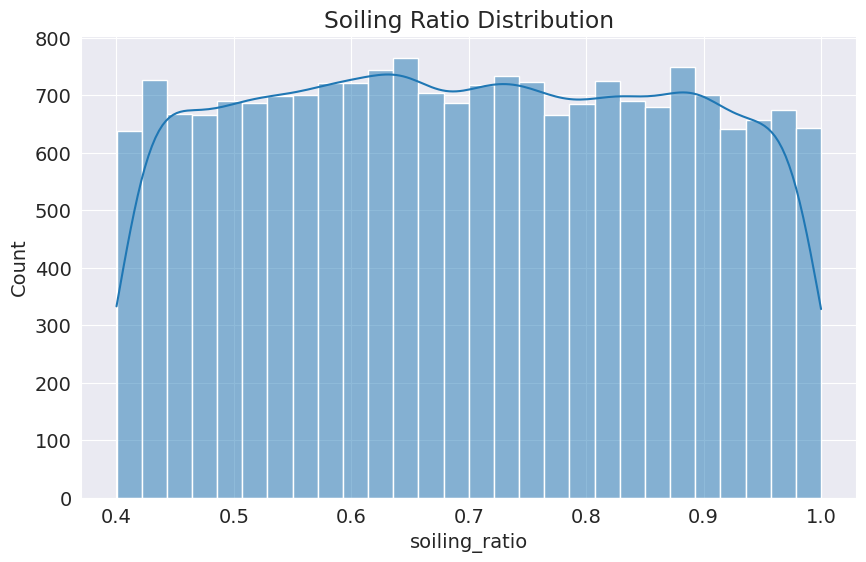

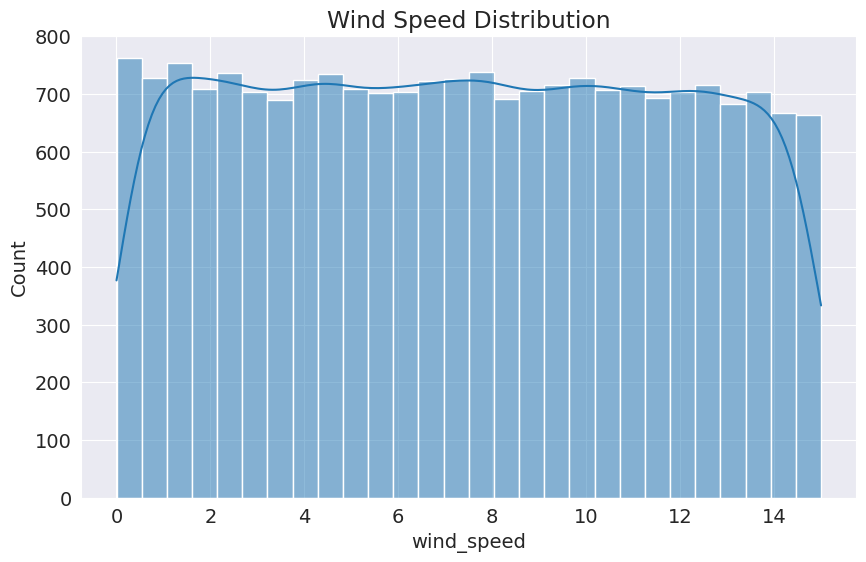

In [ ]:
print(f" avg Soil ratio is {new_df['soiling_ratio'].mean()} and median is {new_df['soiling_ratio'].median()}")
print(f" avg wind speed is {new_df['wind_speed'].mean()} and median is {new_df['wind_speed'].median()}")

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(new_df['soiling_ratio'].dropna(), kde=True)
plt.title("Soiling Ratio Distribution")
plt.show()

sns.histplot(new_df['wind_speed'].dropna(), kde=True)
plt.title("Wind Speed Distribution")
plt.show()


In [ ]:
# Lets fill them with median

new_df["soiling_ratio"] = new_df["soiling_ratio"].fillna(new_df["soiling_ratio"].median())
new_df["wind_speed"] = new_df["wind_speed"].fillna(new_df["wind_speed"].median())

new_df["cloud_coverage"] = new_df["cloud_coverage"].fillna(new_df["cloud_coverage"].median())
new_df["pressure"] = new_df["pressure"].fillna(new_df["pressure"].median())
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         20000 non-null  int64   
 1   temperature                19968 non-null  float64 
 2   irradiance                 19901 non-null  float64 
 3   humidity                   19929 non-null  float64 
 4   panel_age                  19480 non-null  float64 
 5   maintenance_count          19492 non-null  float64 
 6   soiling_ratio              20000 non-null  float64 
 7   voltage                    19908 non-null  float64 
 8   current                    19900 non-null  float64 
 9   module_temperature         19968 non-null  float64 
 10  cloud_coverage             20000 non-null  float64 
 11  wind_speed                 20000 non-null  float64 
 12  pressure                   20000 non-null  float64 
 13  string_id                  2000

# **CHecking for Col that has Infinite values**

In [ ]:
import numpy as np

# Select only numeric columns
numeric_cols = new_df.select_dtypes(include=[np.number])

# Check for infinite values in numeric columns
inf_counts = np.isinf(numeric_cols).sum()
print("Count of infinite values per numeric column:")
print(inf_counts)

# Check if any infinite value anywhere in numeric columns
if np.isinf(numeric_cols.values).any():
    print("There are infinite values in numeric columns of new_df.")
else:
    print("No infinite values found in numeric columns of new_df.")


Count of infinite values per numeric column:
id                             0
temperature                    0
irradiance                    13
humidity                       0
panel_age                      0
maintenance_count              0
soiling_ratio                  0
voltage                        0
current                      234
module_temperature             0
cloud_coverage                 0
wind_speed                     0
pressure                       0
efficiency                     0
error_code_E00                 0
error_code_E01                 0
error_code_E02                 0
error_code_nan                 0
installation_type_encoded      0
power                          0
area                           0
dtype: int64
There are infinite values in numeric columns of new_df.


In [ ]:
# Replace infinite values with NaN so we can handle them uniformly
new_df['irradiance'].replace([np.inf, -np.inf], np.nan, inplace=True)
new_df['current'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Now fill those NaNs — you can use median or mean depending on distribution
new_df['irradiance'].fillna(new_df['irradiance'].median(), inplace=True)
new_df['current'].fillna(new_df['current'].median(), inplace=True)


<ipython-input-274-0246c29a394d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['irradiance'].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-274-0246c29a394d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [ ]:
# train_df = new_df[numerical_cols + cat_col +['area' , 'power']].copy()
# target = train_df['efficiency']


# train_df.info()

In [ ]:
# new_df["installation_type_encoded"] = pd.to_numeric(new_df["installation_type_encoded"], errors='coerce')

# numerical_cols = ['temperature',
#  'irradiance',
#  'humidity',
#  'panel_age',
#  'maintenance_count',
#  'soiling_ratio',
#  'voltage',
#  'current',
#  'module_temperature',
#  'cloud_coverage',
#  'wind_speed',
#  'pressure']

# _df = new_df[numerical_cols + cat_col +['area' , 'power' , 'efficiency']].copy()
# _df = _df.dropna()


# train_df = _df[numerical_cols + cat_col +['area' , 'power']].copy()
# target = _df['efficiency']


# train_df.info()
# len(target)

<class 'pandas.core.frame.DataFrame'>
Index: 16904 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   temperature                16904 non-null  float64
 1   irradiance                 16904 non-null  float64
 2   humidity                   16904 non-null  float64
 3   panel_age                  16904 non-null  float64
 4   maintenance_count          16904 non-null  float64
 5   soiling_ratio              16904 non-null  float64
 6   voltage                    16904 non-null  float64
 7   current                    16904 non-null  float64
 8   module_temperature         16904 non-null  float64
 9   cloud_coverage             16904 non-null  float64
 10  wind_speed                 16904 non-null  float64
 11  pressure                   16904 non-null  float64
 12  installation_type_encoded  16904 non-null  float64
 13  error_code_E00             16904 non-null  float64


16904

In [ ]:
# # Train The Model

# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error
# import xgboost as xgb
# import numpy as np

# kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# for train_ind, val_ind in kfold.split(train_df):
#     x_train, x_val = train_df.iloc[train_ind], train_df.iloc[val_ind]
#     y_train, y_val = target.iloc[train_ind], target.iloc[val_ind]

#     model = xgb.XGBRegressor(
#         n_estimators=1000,
#         learning_rate=0.01,
#         max_depth=10,
#         subsample=0.8,
#         colsample_bytree=0.8,
#         n_jobs=-1
#     )

#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_val)

#     rmse = np.sqrt(mean_squared_error(y_val, y_pred))
#     r2 = model.score(x_val, y_val)

#     print(f"Fold RMSE: {rmse:.4f} | R^2 Score: {r2:.4f}")


Fold RMSE: 0.0464 | R^2 Score: 0.8889
Fold RMSE: 0.0417 | R^2 Score: 0.9040
Fold RMSE: 0.0443 | R^2 Score: 0.9061
Fold RMSE: 0.0420 | R^2 Score: 0.9108
Fold RMSE: 0.0430 | R^2 Score: 0.9035


# **Feature Importance**

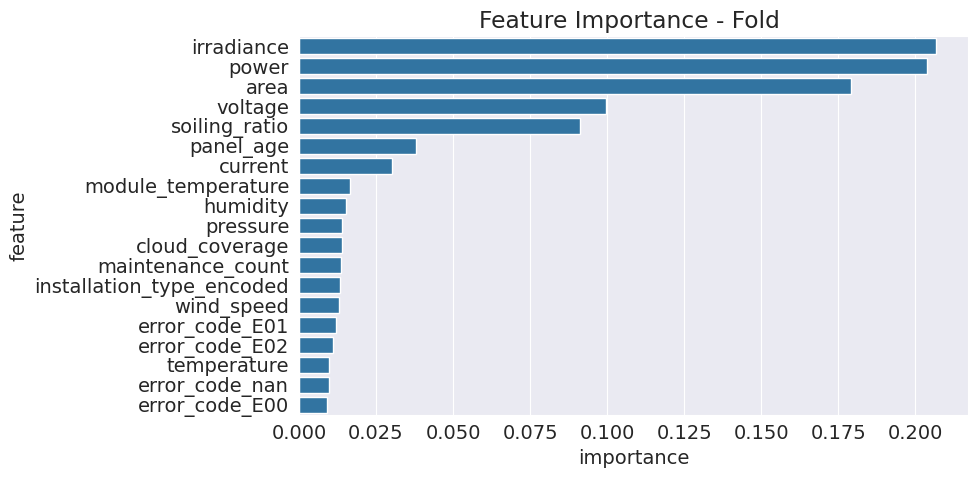

In [ ]:

    # # --- Feature importance ---
    # importance_df = pd.DataFrame({
    #     'feature': x_train.columns,
    #     'importance': model.feature_importances_
    # }).sort_values(by='importance', ascending=False)

    # # Plot
    # plt.figure(figsize=(10, 5))
    # plt.title(f'Feature Importance - Fold ')
    # sns.barplot(data=importance_df.head(20), x='importance', y='feature')
    # plt.tight_layout()
    # plt.show()


# **Preparing Data for Training**

In [ ]:
new_df["installation_type_encoded"] = pd.to_numeric(new_df["installation_type_encoded"], errors='coerce')

numerical_cols = ['temperature',
 'irradiance',
 'humidity',
 'panel_age',
 'maintenance_count',
 'soiling_ratio',
 'voltage',
 'current',
 'module_temperature',
 'cloud_coverage',
 'wind_speed',
 'pressure']

 # Lets remove efficincy from area how??   area = power / irradiance

new_df['area'] = new_df['power'] / new_df['irradiance']
# Store back in file

# new_df.to_csv("/content/drive/MyDrive/HackerEarth/dataset/new_df.csv")

_df = new_df[numerical_cols + cat_col +['area' , 'power' , 'efficiency']].copy()
_df = _df.dropna()



train_df = _df[numerical_cols + cat_col +['area' , 'power']].copy()
target = _df['efficiency']


train_df.info()
len(target)

<class 'pandas.core.frame.DataFrame'>
Index: 18602 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   temperature                18602 non-null  float64
 1   irradiance                 18602 non-null  float64
 2   humidity                   18602 non-null  float64
 3   panel_age                  18602 non-null  float64
 4   maintenance_count          18602 non-null  float64
 5   soiling_ratio              18602 non-null  float64
 6   voltage                    18602 non-null  float64
 7   current                    18602 non-null  float64
 8   module_temperature         18602 non-null  float64
 9   cloud_coverage             18602 non-null  float64
 10  wind_speed                 18602 non-null  float64
 11  pressure                   18602 non-null  float64
 12  installation_type_encoded  18602 non-null  int64  
 13  error_code_E00             18602 non-null  float64


18602

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np
import pandas as pd

feature_importances = []
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for train_ind, val_ind in kfold.split(train_df):
    x_train, x_val = train_df.iloc[train_ind], train_df.iloc[val_ind]
    y_train, y_val = target.iloc[train_ind], target.iloc[val_ind]

    scaler = StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_val = scaler.transform(x_val)

    model = xgb.XGBRegressor(
        n_estimators=1000,
        learning_rate=0.01,
        max_depth=10,
        subsample=0.8,
        colsample_bytree=0.8,
        n_jobs=-1
    )

    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = model.score(x_val, y_val)

    print(f"Fold RMSE: {rmse:.4f} | R^2 Score: {r2:.4f}")

    feature_importances.append(model.feature_importances_)

# Average the importances
mean_importances = np.mean(feature_importances, axis=0)

# Map to feature names
feature_names = train_df.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': mean_importances
}).sort_values(by='Importance', ascending=False)

print("\nAverage Feature Importances:")
print(importance_df)


Fold RMSE: 0.0649 | R^2 Score: 0.7845
Fold RMSE: 0.0682 | R^2 Score: 0.7643
Fold RMSE: 0.0697 | R^2 Score: 0.7454
Fold RMSE: 0.0650 | R^2 Score: 0.7813
Fold RMSE: 0.0681 | R^2 Score: 0.7753

Average Feature Importances:
                      Feature  Importance
6                     voltage    0.202082
1                  irradiance    0.170771
18                      power    0.143245
5               soiling_ratio    0.095055
17                       area    0.090296
3                   panel_age    0.043990
7                     current    0.028694
8          module_temperature    0.021914
15             error_code_E02    0.020691
2                    humidity    0.020399
12  installation_type_encoded    0.020346
11                   pressure    0.020229
10                 wind_speed    0.019374
9              cloud_coverage    0.019042
4           maintenance_count    0.018596
16             error_code_nan    0.017811
14             error_code_E01    0.016686
13             error_cod

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         20000 non-null  int64  
 1   temperature                19511 non-null  float64
 2   irradiance                 19496 non-null  float64
 3   humidity                   19930 non-null  float64
 4   panel_age                  19484 non-null  float64
 5   maintenance_count          19500 non-null  float64
 6   soiling_ratio              19497 non-null  float64
 7   voltage                    19499 non-null  float64
 8   current                    19481 non-null  float64
 9   module_temperature         19500 non-null  float64
 10  cloud_coverage             19455 non-null  float64
 11  wind_speed                 19931 non-null  float64
 12  pressure                   19926 non-null  float64
 13  string_id                  20000 non-null  obj

In [ ]:
# #Lets fill nan values of wind speed with mean
# #Lets fill nan values of cloud_coverage with median
# #Lets fill nan values of pressure with mean
# #Lets fill nan values of Soiling with median

# new_df["wind_speed"] = new_df["wind_speed"].fillna(new_df["wind_speed"].mean())
# new_df["cloud_coverage"] = new_df["cloud_coverage"].fillna(new_df["cloud_coverage"].median())
# new_df["pressure"] = new_df["pressure"].fillna(new_df["pressure"].mean())
# new_df["soiling_ratio"] = new_df["soiling_ratio"].fillna(new_df["soiling_ratio"].median())

# new_df.info()

# # Lets go back and re run the validation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         20000 non-null  int64  
 1   temperature                19511 non-null  float64
 2   irradiance                 19496 non-null  float64
 3   humidity                   19930 non-null  float64
 4   panel_age                  19484 non-null  float64
 5   maintenance_count          19500 non-null  float64
 6   soiling_ratio              20000 non-null  float64
 7   voltage                    19499 non-null  float64
 8   current                    19481 non-null  float64
 9   module_temperature         19500 non-null  float64
 10  cloud_coverage             20000 non-null  float64
 11  wind_speed                 20000 non-null  float64
 12  pressure                   20000 non-null  float64
 13  string_id                  20000 non-null  obj

In [ ]:
cleaned_df = new_df.copy()
cleaned_df.to_csv("/content/drive/MyDrive/HackerEarth/dataset/cleaned_df.csv")

NameError: name 'new_df' is not defined

In [ ]:
feat = numerical_cols + cat_col +['area' , 'power']
feat

['temperature',
 'irradiance',
 'humidity',
 'panel_age',
 'maintenance_count',
 'soiling_ratio',
 'voltage',
 'current',
 'module_temperature',
 'cloud_coverage',
 'wind_speed',
 'pressure',
 'installation_type_encoded',
 'error_code_E00',
 'error_code_E01',
 'error_code_E02',
 'error_code_nan',
 'area',
 'power']

#  **LETS START TO TRAIN THE MODEL**

In [ ]:
import pandas as pd

cleaned_train_df = pd.read_csv("/content/drive/MyDrive/HackerEarth/dataset/cleaned_df.csv")
test_cleaned_df  = pd.read_csv("/content/drive/MyDrive/HackerEarth/dataset/test_cleaned_df.csv")


In [ ]:
new_df = cleaned_train_df.copy()
new_df["installation_type_encoded"] = pd.to_numeric(new_df["installation_type_encoded"], errors='coerce')

numerical_cols = ['temperature',
 'irradiance',
 'humidity',
 'panel_age',
 'maintenance_count',
 'soiling_ratio',
 'voltage',
 'current',
 'module_temperature',
 'cloud_coverage',
 'wind_speed',
 'pressure']

features = ['temperature', 'irradiance', 'humidity', 'panel_age', 'maintenance_count',
            'soiling_ratio', 'voltage', 'current', 'module_temperature', 'cloud_coverage',
            'wind_speed', 'pressure', 'installation_type_encoded', 'error_code_E00',
            'error_code_E01', 'error_code_E02', 'error_code_nan', 'area', 'power']

 # Lets remove efficincy from area how??   area = power / irradiance

new_df['area'] = new_df['power'] / new_df['irradiance']
# Store back in file

# new_df.to_csv("/content/drive/MyDrive/HackerEarth/dataset/new_df.csv")

_df = new_df[features + ['efficiency']].copy()
_df = _df.dropna()



train_df = _df[features].copy()
target = _df['efficiency']


train_df.info()
len(target)

<class 'pandas.core.frame.DataFrame'>
Index: 18602 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   temperature                18602 non-null  float64
 1   irradiance                 18602 non-null  float64
 2   humidity                   18602 non-null  float64
 3   panel_age                  18602 non-null  float64
 4   maintenance_count          18602 non-null  float64
 5   soiling_ratio              18602 non-null  float64
 6   voltage                    18602 non-null  float64
 7   current                    18602 non-null  float64
 8   module_temperature         18602 non-null  float64
 9   cloud_coverage             18602 non-null  float64
 10  wind_speed                 18602 non-null  float64
 11  pressure                   18602 non-null  float64
 12  installation_type_encoded  18602 non-null  int64  
 13  error_code_E00             18602 non-null  float64


18602

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np
import pandas as pd

feature_importances = []
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for train_ind, val_ind in kfold.split(train_df):
    x_train, x_val = train_df.iloc[train_ind], train_df.iloc[val_ind]
    y_train, y_val = target.iloc[train_ind], target.iloc[val_ind]

    scaler = StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_val = scaler.transform(x_val)

    model = xgb.XGBRegressor(
        n_estimators=10000,
        learning_rate=0.01,
        max_depth=10,
        subsample=0.8,
        colsample_bytree=0.8,
        n_jobs=-1
    )

    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = model.score(x_val, y_val)

    print(f"Fold RMSE: {rmse:.4f} | R^2 Score: {r2:.4f}")

    feature_importances.append(model.feature_importances_)

# Average the importances
mean_importances = np.mean(feature_importances, axis=0)

# Map to feature names
feature_names = train_df.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': mean_importances
}).sort_values(by='Importance', ascending=False)

print("\nAverage Feature Importances:")
print(importance_df)


Fold RMSE: 0.0649 | R^2 Score: 0.7844
Fold RMSE: 0.0682 | R^2 Score: 0.7643
Fold RMSE: 0.0697 | R^2 Score: 0.7453
Fold RMSE: 0.0650 | R^2 Score: 0.7813
Fold RMSE: 0.0679 | R^2 Score: 0.7762

Average Feature Importances:
                      Feature  Importance
6                     voltage    0.196631
1                  irradiance    0.174897
18                      power    0.152676
17                       area    0.103586
5               soiling_ratio    0.091494
3                   panel_age    0.045180
7                     current    0.026620
2                    humidity    0.020870
8          module_temperature    0.019768
15             error_code_E02    0.018894
12  installation_type_encoded    0.018791
11                   pressure    0.018409
4           maintenance_count    0.017698
10                 wind_speed    0.017452
9              cloud_coverage    0.016853
0                 temperature    0.016010
16             error_code_nan    0.015337
14             error_cod

In [ ]:
models = []
scalers = []
test_preds = []

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np
import pandas as pd

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for train_ind, val_ind in kfold.split(train_df):
    x_train, x_val = train_df.iloc[train_ind], train_df.iloc[val_ind]
    y_train, y_val = target.iloc[train_ind], target.iloc[val_ind]

    scaler = StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_val = scaler.transform(x_val)

    model = xgb.XGBRegressor(
        n_estimators=10000,
        learning_rate=0.001,
        max_depth=15,
        subsample=0.9,
        colsample_bytree=0.8,
        n_jobs=-1
    )

    # from lightgbm import LGBMRegressor

    # model = LGBMRegressor(
    # n_estimators=10000,
    # learning_rate=0.01,
    # max_depth=12,
    # subsample=0.8,
    # colsample_bytree=0.8,
    # n_jobs=-1
    # )


    model.fit(x_train, y_train)
    models.append(model)
    scalers.append(scaler)

# ✅ Predict with each model, average predictions
for model, scaler in zip(models, scalers):
    test_scaled = scaler.transform(test_cleaned_df)
    test_preds.append(model.predict(test_scaled))

final_prediction = np.mean(test_preds, axis=0)


In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/HackerEarth/dataset/test.csv")


In [ ]:
# Assuming 'id' column is in your original test dataframe (not dropped during cleaning)
sample_submission_df = pd.DataFrame({
    'id': test_df['id'],  # or test_cleaned_df['id'] if it exists there
    'efficiency': final_prediction
})

# Save to CSV
sample_submission_df.to_csv('sample_submission.csv', index=False)


In [ ]:
sample_submission_df.to_csv("/content/drive/MyDrive/HackerEarth/dataset/submission.csv")